<a href="https://colab.research.google.com/github/gkalwaysno1/Multilabel-Disease-prediction/blob/main/brain_tum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
import imghdr

In [5]:
data_dir='/content/drive/MyDrive/Brain_tumor/Training'
image_list,label_list=[],[]
all_labels=['glioma','meningioma','notumor','pituitary']
bin_labl=[0,1,2,3]
temp=-1
image_ext=['jpeg','jpg','png']

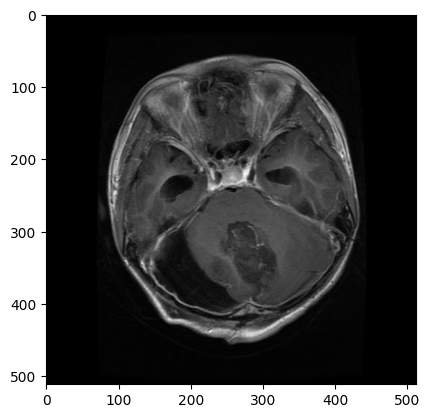

In [6]:
img=cv2.imread(os.path.join('Data','Testing','/content/drive/MyDrive/Brain_tumor/Testing/glioma/Te-glTr_0000.jpg'))
# img.shape
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
from PIL import Image
import os

# def resize_images_in_folder(folder_path, target_size=(256, 256)):
#     for filename in os.listdir(folder_path):
#         img_path = os.path.join(folder_path, filename)

#         try:
#             img = Image.open(img_path)

#             # Convert image to RGB mode if it's in the 'P' mode
#             if img.mode != 'RGB':
#                 img = img.convert('RGB')

#             img_resized = img.resize(target_size)
#             img_resized.save(img_path)
#         except Exception as e:
#             print(f"Error processing {img_path}: {e}")

# # Replace 'folder1', 'folder2', 'folder3', and 'folder4' with your actual folder paths
# folders = ['/content/drive/MyDrive/Brain_tumor/Training/glioma',
#            '/content/drive/MyDrive/Brain_tumor/Training/meningioma',
#            '/content/drive/MyDrive/Brain_tumor/Training/notumor',
#            '/content/drive/MyDrive/Brain_tumor/Training/pituitary']

# for folder in folders:
#     resize_images_in_folder(folder)


In [8]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 5732 files belonging to 4 classes.


In [11]:
data_iterator=data.as_numpy_iterator()
data_iterator

In [12]:
batch=data_iterator.next()
batch[1]

array([0, 1, 1, 3, 0, 2, 3, 1, 1, 1, 3, 0, 2, 0, 2, 3, 1, 2, 0, 0, 2, 3,
       2, 1, 2, 1, 1, 1, 1, 3, 1, 0], dtype=int32)

In [13]:
from PIL import Image
def convert_image_to_array(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

In [14]:
# import PIL
for dir in all_labels:
  brn_img_list=os.listdir(f"{data_dir}/{dir}/")
  temp+=1
  for files in brn_img_list:
    try:
      img_path=f"{data_dir}/{dir}/{files}"
      image_list.append(convert_image_to_array(img_path))
      label_list.append(bin_labl[temp])
    except:
        print(f"Error opening image at {img_path}")

Error opening image at /content/drive/MyDrive/Brain_tumor/Training/pituitary/Tr-pi_1119.jpg


In [15]:
print(tf.__version__)

2.12.0


In [16]:
import pandas as pd

label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()
#0-glioma, 1-meningioma, 2-notumor, 3-pituitary

2    1595
3    1466
1    1349
0    1321
dtype: int64

In [17]:
image_list[0].shape

(256, 256, 3)

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=10)


In [19]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

In [20]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="softmax"))
# model.add(Dense(1, activation='sigmoid'))


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [24]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=10)


In [25]:
history=model.fit(x_train,y_train,batch_size=128,epochs=18,validation_data=(x_val,y_val))

Epoch 1/18
29/29 [==============================] - 24s 349ms/step - loss: 0.5670 - accuracy: 0.4003 - val_loss: 0.5340 - val_accuracy: 0.4297
Epoch 2/18
29/29 [==============================] - 4s 145ms/step - loss: 0.4982 - accuracy: 0.4810 - val_loss: 0.4905 - val_accuracy: 0.4820
Epoch 3/18
29/29 [==============================] - 4s 139ms/step - loss: 0.4505 - accuracy: 0.6128 - val_loss: 0.4404 - val_accuracy: 0.6292
Epoch 4/18
29/29 [==============================] - 5s 158ms/step - loss: 0.3817 - accuracy: 0.6932 - val_loss: 0.3981 - val_accuracy: 0.6979
Epoch 5/18
29/29 [==============================] - 4s 146ms/step - loss: 0.3256 - accuracy: 0.7325 - val_loss: 0.3575 - val_accuracy: 0.7197
Epoch 6/18
29/29 [==============================] - 4s 140ms/step - loss: 0.2805 - accuracy: 0.7608 - val_loss: 0.3289 - val_accuracy: 0.7241
Epoch 7/18
29/29 [==============================] - 5s 177ms/step - loss: 0.2527 - accuracy: 0.7884 - val_loss: 0.3029 - val_accuracy: 0.7699
Epoch

In [26]:
history.history

{'loss': [0.567008912563324,
  0.49823251366615295,
  0.4505441188812256,
  0.3817225992679596,
  0.3256169557571411,
  0.2805192470550537,
  0.2527078092098236,
  0.22902245819568634,
  0.21987397968769073,
  0.20404157042503357,
  0.19028803706169128,
  0.17851640284061432,
  0.1728789359331131,
  0.162247434258461,
  0.15555089712142944,
  0.14736539125442505,
  0.14288796484470367,
  0.13954563438892365],
 'accuracy': [0.40032723546028137,
  0.4810471832752228,
  0.612762451171875,
  0.693209707736969,
  0.7324788570404053,
  0.7608399391174316,
  0.788382887840271,
  0.8129261136054993,
  0.8265612125396729,
  0.841559886932373,
  0.8535587787628174,
  0.8636487722396851,
  0.8811017274856567,
  0.8898282051086426,
  0.8999181985855103,
  0.9037359952926636,
  0.9198254942893982,
  0.9239159822463989],
 'val_loss': [0.5339733362197876,
  0.4904998242855072,
  0.44040611386299133,
  0.3981194496154785,
  0.35745570063591003,
  0.3289075791835785,
  0.30293193459510803,
  0.30656728

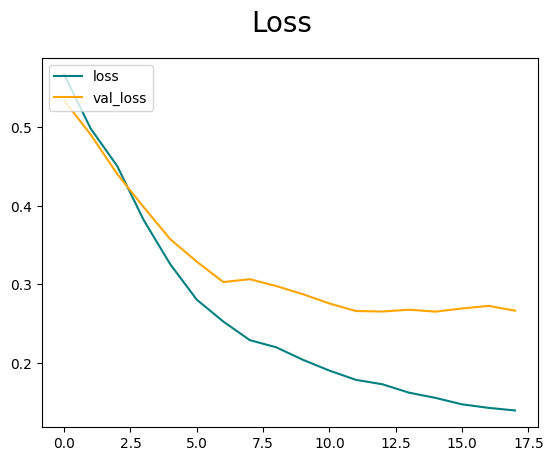

In [27]:
#plot performance
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [28]:
model.save("/content/drive/MyDrive/Model_save/bt.h5")

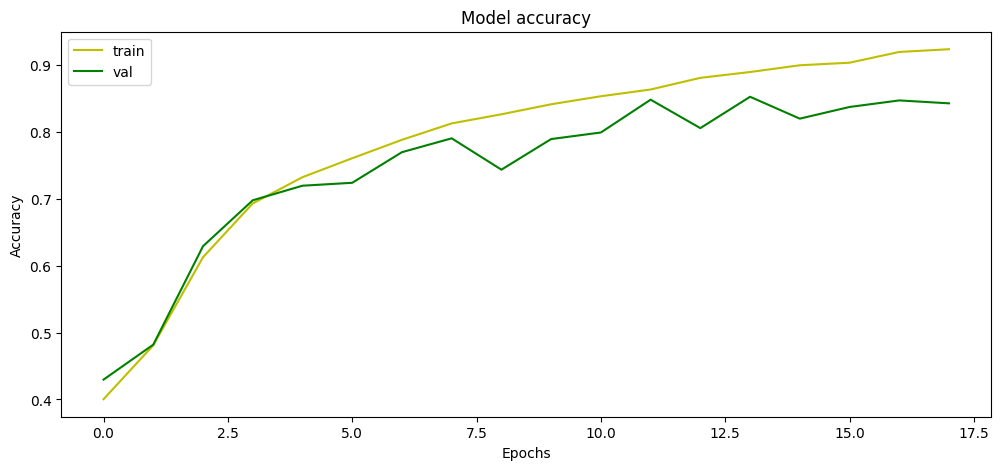

In [29]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='y')
plt.plot(history.history['val_accuracy'],color='g')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [30]:
print("Calculating model accuracy")
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy :{scores[1]*100}")

Calculating model accuracy
36/36 [==============================] - 1s 28ms/step - loss: 0.2918 - accuracy: 0.8387
Test Accuracy :83.87096524238586


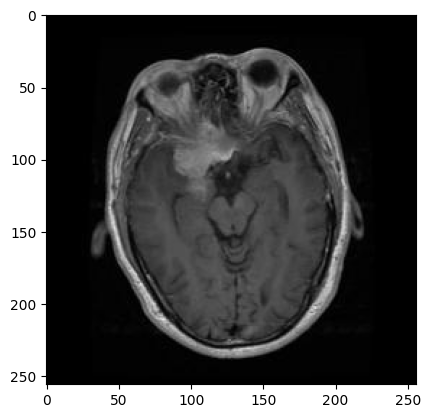

In [31]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
img=cv2.imread('/content/drive/MyDrive/Brain_tumor/Training/meningioma/Tr-meTr_0005.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

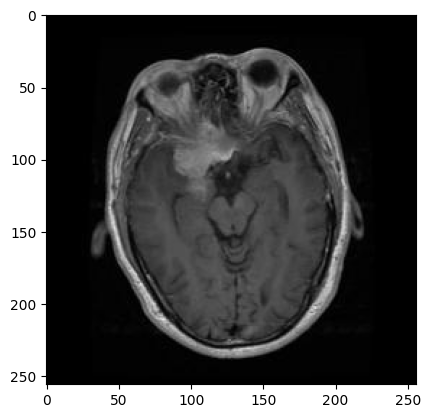

In [32]:
resz=tf.image.resize(img,(256,256))
plt.imshow((resz.numpy().astype(int)))
plt.show()

In [33]:
import numpy as np
np.expand_dims(resz,0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [34]:
yhat=model.predict(np.expand_dims(resz/255,0))
yhat

1/1 [==============================] - 0s 153ms/step


array([[2.4570916e-03, 9.9679202e-01, 1.9826410e-04, 5.5261946e-04]],
      dtype=float32)

In [35]:
from keras.models import load_model
new_model=load_model(os.path.join('/content/drive/MyDrive/Model_save','bt.h5'))

In [36]:
final=new_model.predict(np.expand_dims(resz/255,0))

1/1 [==============================] - 0s 75ms/step


In [37]:
final.tolist()

[[0.002457091584801674,
  0.9967920184135437,
  0.00019826409697998315,
  0.0005526194581761956]]

In [38]:
lst=final[0]
max1=max(lst)
def ind(lst):
  for i in range(4):
    if(max1==lst[i]):
      return i
k=ind(lst)

In [39]:

if k==0:
  print("Person is diagnozed with glioma")
elif k==1:
  print("Person is diagnozed with Meningioma")
elif k==3:
  print("Person is diagnozed with Pituitary tumor")
else:
  print("Person is not affected by brain tumor")

Person is diagnozed with Meningioma
